In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_5day_3term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_scaler,y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (19500, 6) (19500,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (50937, 6) (50937,)
SMOTE 적용 전 레이블 값 분포: 
 0    16979
1     1648
2      873
Name: 8, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    16979
1    16979
2    16979
Name: 8, dtype: int64


In [3]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]
CMResult=[[[0 for k in range(3)]for j in range(3)] for i in range(10)]
skf.get_n_splits(X_train_over,y_train_over)

10

[0]Accuracy : 0.5783274440518257
[0]F1score : 0.5766517587806528
[0]Precision : 0.5780220726741869
[0]Recall : 0.5783274440518257



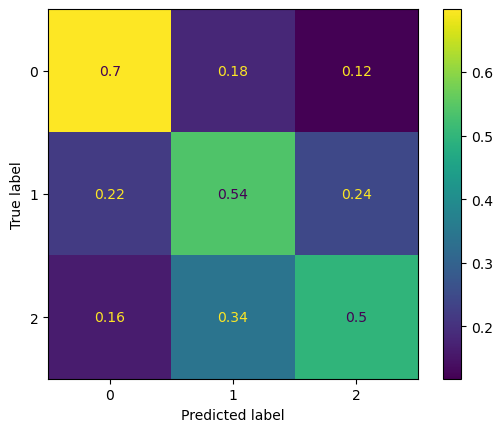

[1]Accuracy : 0.519827247742442
[1]F1score : 0.5213333730837022
[1]Precision : 0.5263389905973961
[1]Recall : 0.519827247742442



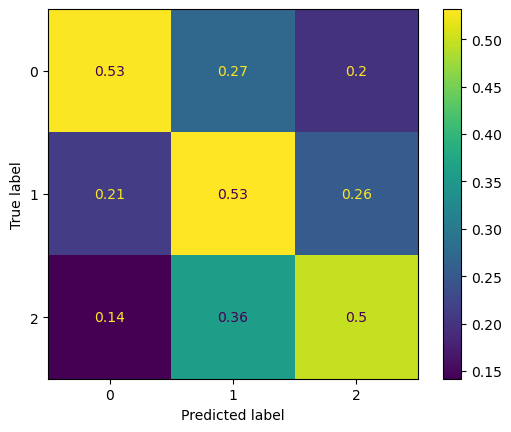

[2]Accuracy : 0.5396544954848842
[2]F1score : 0.5410533145439966
[2]Precision : 0.5455733780989188
[2]Recall : 0.5396544954848842



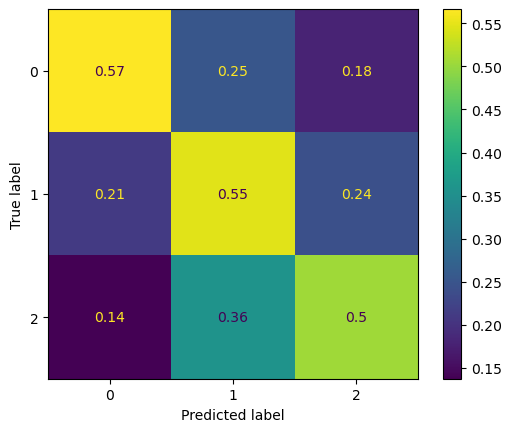

[3]Accuracy : 0.5667451904201021
[3]F1score : 0.5675811606200498
[3]Precision : 0.5700589776351018
[3]Recall : 0.5667451904201021



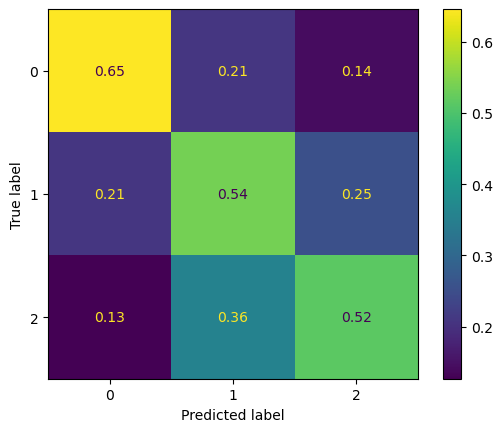

[4]Accuracy : 0.5127601099332548
[4]F1score : 0.5141253869183582
[4]Precision : 0.5239955482769052
[4]Recall : 0.5127601099332548



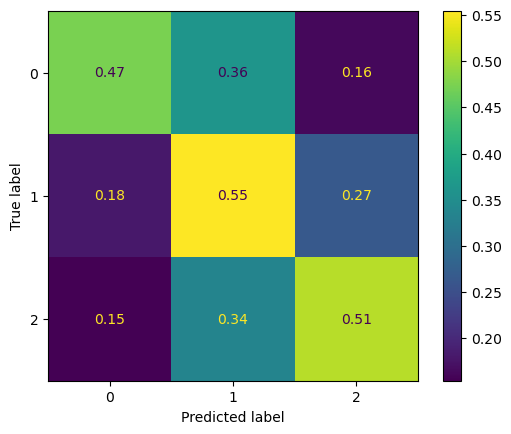

[5]Accuracy : 0.5804868472712996
[5]F1score : 0.5809464655768238
[5]Precision : 0.5859355396120158
[5]Recall : 0.5804868472712996



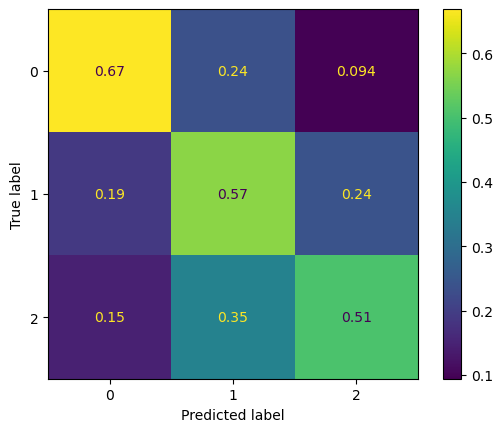

[6]Accuracy : 0.5051040439733019
[6]F1score : 0.5041013567567694
[6]Precision : 0.5127309154617181
[6]Recall : 0.5051040439733019



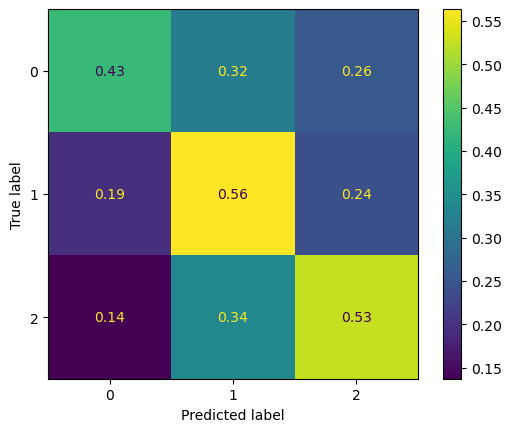

[7]Accuracy : 0.5165913999607304
[7]F1score : 0.5177275771572767
[7]Precision : 0.5269902592777126
[7]Recall : 0.5165913999607304



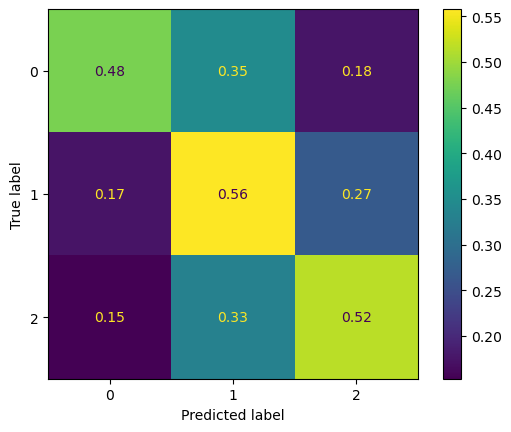

[8]Accuracy : 0.5387787158845474
[8]F1score : 0.5407314448642948
[8]Precision : 0.547184379220746
[8]Recall : 0.5387787158845474



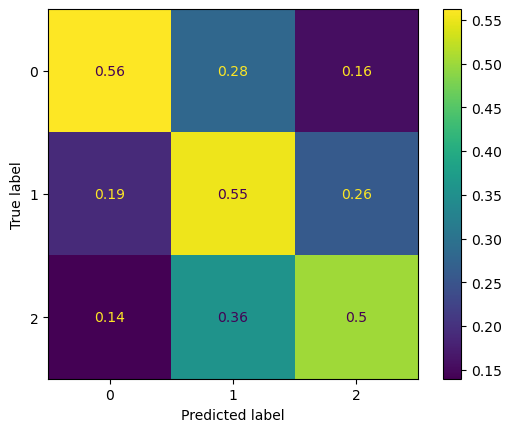

[9]Accuracy : 0.5517376791674847
[9]F1score : 0.553227946880374
[9]Precision : 0.5569661486426174
[9]Recall : 0.5517376791674847



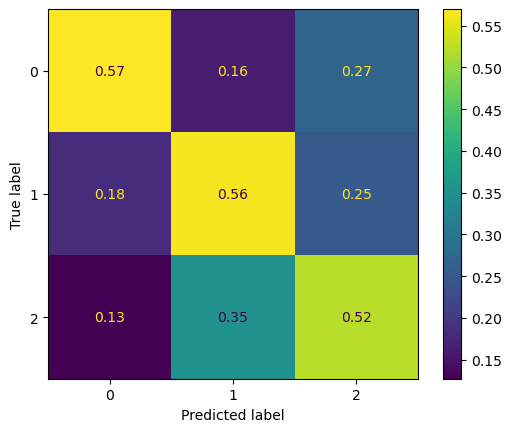

In [4]:
i=0
for tfold, (train_index, test_index) in enumerate(skf.split(X_train_over, y_train_over)):
    #모델 정의, 예측

    X_train, X_test = X_train_over[train_index], X_train_over[test_index]
    y_train, y_test = y_train_over[train_index], y_train_over[test_index]

    model = SVC(kernel='rbf', C=8, gamma=0.1)
    model.fit(X_train,y_train) # rbf Kernel
    predict=model.predict(X_test)
    
    
    predict=model.predict(X_test)
    #Accuracy
    print("[{}]Accuracy : {}".format(i,model.score(X_test,y_test)))
    #f1score
    f1 = f1_score(y_test,predict, average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    #precision/recall
    list=sk(y_test,predict,beta=1,average='weighted')
    print("[{}]Precision : {}".format(i,list[0]))
    print("[{}]Recall : {}".format(i,list[1]))
    print()
    
    #결과 배열에 넣기
    Result[i][0]=model.score(X_test,y_test)
    Result[i][1]=list[2]
    Result[i][2]=list[0]
    Result[i][3]=list[1]
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predict)

    cm = confusion_matrix(y_test, predict, labels=[0,1,2],normalize="true")
    CMResult[i]=cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig("./ConfusionMatrix/"+filename+".png")
    plt.show()
    
    i=i+1
    

In [5]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix.xlsx')

,Accuracy,F1-Score,Precision,Recall
0,0.578327,0.576652,0.578022,0.578327
1,0.519827,0.521333,0.526339,0.519827
2,0.539654,0.541053,0.545573,0.539654
3,0.566745,0.567581,0.570059,0.566745
4,0.512760,0.514125,0.523996,0.512760
5,0.580487,0.580946,0.585936,0.580487
6,0.505104,0.504101,0.512731,0.505104
7,0.516591,0.517728,0.526990,0.516591
8,0.538779,0.540731,0.547184,0.538779
9,0.551738,0.553228,0.556966,0.551738


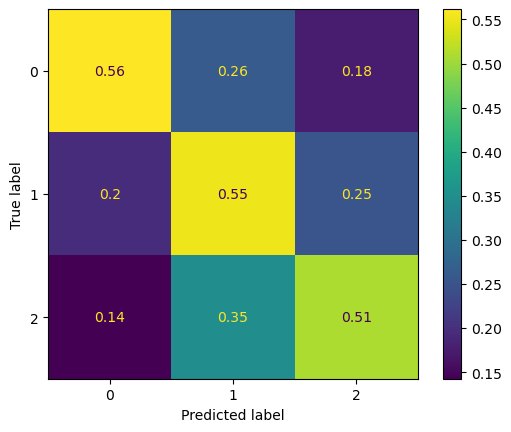

In [8]:
import numpy as np

AverageCM=[[0 for i in range(3)] for j in range(3)]
for i in range(10):
    for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]+CMResult[i][j][k]

for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]/10
            
AverageCM=np.array(AverageCM)           
disp = ConfusionMatrixDisplay(confusion_matrix=AverageCM,display_labels=[0,1,2])
disp.plot()
filename=("AverageConfusionMatrix.png")
plt.savefig(filename+".png")
plt.show()